In [1]:
import numpy as np
from sklearn import metrics
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
from preprocess import *

x = Preprocess('LindseyGrahamSC')
X = x.td_matrix.toarray()

08/18/2019 01:42:27 AM | INFO | Gathering Tweets from /home/healyt22/git/politopics/tweet_data/LindseyGrahamSC/
08/18/2019 01:42:27 AM | INFO | Processing Tweets from LindseyGrahamSC


In [2]:
def cos_similarity(x, y):
    sol = (x.dot(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
    return(sol)

n = X.shape[0]
A = np.zeros((n,n))

i = np.nditer(A, flags=['multi_index'])
while not i.finished:
    A[i.multi_index] = cos_similarity(X[i.multi_index[0],:], 
                                      X[i.multi_index[1],:])
    i.iternext()

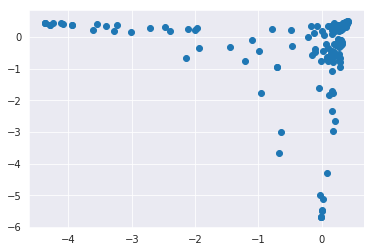

In [3]:
eps = 10

# Generate final matrix A, and row normalized matrix M. 
Ak = metrics.pairwise.rbf_kernel(A, gamma=1./(2.*eps))
M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(Ak)
V = V/V[:,0]
sb.set_style('darkgrid')
plt.scatter(V[:,1], V[:,2])